In [1]:
import pandas

In [4]:
header = ["ncodpers", "age", "ind_ahor_fin_ult1","ind_aval_fin_ult1","ind_cco_fin_ult1","ind_cder_fin_ult1","ind_cno_fin_ult1","ind_ctju_fin_ult1","ind_ctma_fin_ult1","ind_ctop_fin_ult1","ind_ctpp_fin_ult1","ind_deco_fin_ult1","ind_deme_fin_ult1","ind_dela_fin_ult1","ind_ecue_fin_ult1","ind_fond_fin_ult1","ind_hip_fin_ult1","ind_plan_fin_ult1","ind_pres_fin_ult1","ind_reca_fin_ult1","ind_tjcr_fin_ult1","ind_valo_fin_ult1","ind_viv_fin_ult1","ind_nomina_ult1","ind_nom_pens_ult1","ind_recibo_ult1"]

tr = pandas.read_csv('data/train_2016_05_28.csv', header=None, names=header, usecols=[1, 5] + range(24, 48))

age_20_25 = tr.apply(lambda x: x[1] > 20 and x[1] < 25, axis = 1)

tr_20_25_age = tr.loc[age_20_25]

# tr_20_25_age.head()

feature1 = 'ind_cco_fin_ult1'
feature2 = 'ind_cno_fin_ult1'

persons_of_feature = dict()
for feat in header[2:]:
    persons_of_feature[feat] = set(tr_20_25_age.loc[tr_20_25_age[feat] == 1]["ncodpers"])

for feat in header[2:]:
    print feat, len(persons_of_feature[feat])

ind_ahor_fin_ult1 0
ind_aval_fin_ult1 0
ind_cco_fin_ult1 146691
ind_cder_fin_ult1 0
ind_cno_fin_ult1 3945
ind_ctju_fin_ult1 4
ind_ctma_fin_ult1 57
ind_ctop_fin_ult1 358
ind_ctpp_fin_ult1 1
ind_deco_fin_ult1 0
ind_deme_fin_ult1 2
ind_dela_fin_ult1 147
ind_ecue_fin_ult1 2167
ind_fond_fin_ult1 70
ind_hip_fin_ult1 0
ind_plan_fin_ult1 5
ind_pres_fin_ult1 5
ind_reca_fin_ult1 477
ind_tjcr_fin_ult1 225
ind_valo_fin_ult1 106
ind_viv_fin_ult1 0
ind_nomina_ult1 1891
ind_nom_pens_ult1 2058
ind_recibo_ult1 6028


In [5]:
def jacobian_similarity(featur1, featur2):
    feat1 = persons_of_feature[featur1]
    feat2 = persons_of_feature[featur2]
    len1 = len(feat1)
    len2 = len(feat2)
    intersection = len(feat1.intersection(feat2))
    union = len1 + len2 - intersection
    if len1 == 0 or len1 == 0:
        return 0.0
    return intersection * 1.0 / union

In [6]:
import math
def cosine_similarity(featur1, featur2):
    feat1 = persons_of_feature[featur1]
    feat2 = persons_of_feature[featur2]
    len1 = len(feat1)
    len2 = len(feat2)
    intersection = len(feat1.intersection(feat2))
    # union = len1 + len2 - intersection
    if len1 == 0 or len2 == 0:
        return 0.0
    return intersection * 1.0 / math.sqrt(len1*len2)

In [51]:
import collections

jacob_matrix = collections.defaultdict(dict)
cosine_matrix = collections.defaultdict(dict)
for i in range(24):
    jacob_matrix[header[i+2]][header[i+2]] = 1.0
    cosine_matrix[header[i+2]][header[i+2]] = 1.0
    for j in range(i + 1, 24):
        temp = jacobian_similarity(header[i + 2], header[j+2])
        jacob_matrix[header[i + 2]][header[j+2]] = temp
        jacob_matrix[header[j+2]][header[i+2]] = temp
        
        temp1 = cosine_similarity(header[i+2], header[j+2])
        cosine_matrix[header[i+2]][header[j+2]] = temp1
        cosine_matrix[header[j+2]][header[i+2]] = temp1


for key in jacob_matrix.keys():
    print 'jacob', key, map(lambda x: x[0], sorted(jacob_matrix[key].items(), cmp = lambda x, y: cmp(x[1], y[1]), reverse = True)[:4])
    print 'cosine', key, map(lambda x: x[0], sorted(cosine_matrix[key].items(), cmp = lambda x, y: cmp(x[1], y[1]), reverse = True)[:4])
    

jacob ind_cco_fin_ult1 ['ind_cco_fin_ult1', 'ind_recibo_ult1', 'ind_ecue_fin_ult1', 'ind_reca_fin_ult1']
cosine ind_cco_fin_ult1 ['ind_cco_fin_ult1', 'ind_recibo_ult1', 'ind_ecue_fin_ult1', 'ind_ctop_fin_ult1']
jacob ind_deme_fin_ult1 ['ind_deme_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_cco_fin_ult1', 'ind_pres_fin_ult1']
cosine ind_deme_fin_ult1 ['ind_deme_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_cco_fin_ult1', 'ind_pres_fin_ult1']
jacob ind_pres_fin_ult1 ['ind_pres_fin_ult1', 'ind_recibo_ult1', 'ind_nom_pens_ult1', 'ind_cno_fin_ult1']
cosine ind_pres_fin_ult1 ['ind_pres_fin_ult1', 'ind_recibo_ult1', 'ind_nom_pens_ult1', 'ind_cno_fin_ult1']
jacob ind_valo_fin_ult1 ['ind_valo_fin_ult1', 'ind_fond_fin_ult1', 'ind_ecue_fin_ult1', 'ind_tjcr_fin_ult1']
cosine ind_valo_fin_ult1 ['ind_valo_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_recibo_ult1']
jacob ind_reca_fin_ult1 ['ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_nom_pens_ult1', 'ind_nomina_ult1']
cosine ind_reca_fin_ult1 ['ind_reca

In [11]:
for key in jacob_matrix.keys():
    print 'jacob', key, map(lambda x: x, sorted(jacob_matrix[key].items(), cmp = lambda x, y: cmp(x[1], y[1]), reverse = True)[:2])
    print 'cosine', key, map(lambda x: x, sorted(cosine_matrix[key].items(), cmp = lambda x, y: cmp(x[1], y[1]), reverse = True)[:2])
    

jacob ind_cco_fin_ult1 [('ind_recibo_ult1', 0.03157844965010402), ('ind_ecue_fin_ult1', 0.009521613520148657)]
cosine ind_cco_fin_ult1 [('ind_recibo_ult1', 0.1572147389075366), ('ind_ecue_fin_ult1', 0.0787473445015371)]
jacob ind_deme_fin_ult1 [('ind_tjcr_fin_ult1', 0.004424778761061947), ('ind_cco_fin_ult1', 1.3634101614959337e-05)]
cosine ind_deme_fin_ult1 [('ind_tjcr_fin_ult1', 0.04714045207910317), ('ind_cco_fin_ult1', 0.0036924384375314014)]
jacob ind_pres_fin_ult1 [('ind_recibo_ult1', 0.0006634599436059048), ('ind_nom_pens_ult1', 0.00048496605237633366)]
cosine ind_pres_fin_ult1 [('ind_recibo_ult1', 0.023040312613082318), ('ind_nom_pens_ult1', 0.00985807941917649)]
jacob ind_valo_fin_ult1 [('ind_fond_fin_ult1', 0.029239766081871343), ('ind_ecue_fin_ult1', 0.013826940231935772)]
cosine ind_valo_fin_ult1 [('ind_ecue_fin_ult1', 0.06468138422723356), ('ind_fond_fin_ult1', 0.05804543252657151)]
jacob ind_reca_fin_ult1 [('ind_tjcr_fin_ult1', 0.02932551319648094), ('ind_nom_pens_ult1', 

In [42]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

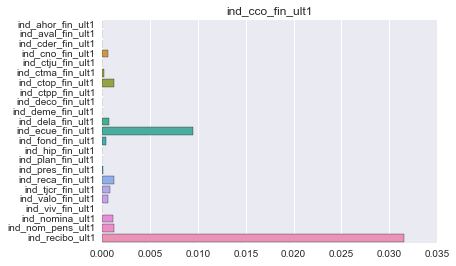

In [73]:
d = jacob_matrix[feature1]
#d = dict(filter(lambda x: x[0] != feature1, d.items()))
keys = filter(lambda x: x != feature1, header[2:])

p = seaborn.barplot(map(lambda x: d[x], keys), keys)
p = p.set_title(feature1)
# temp = p.set_xticklabels(p.get_xticklabels(), rotation = 'vertical')

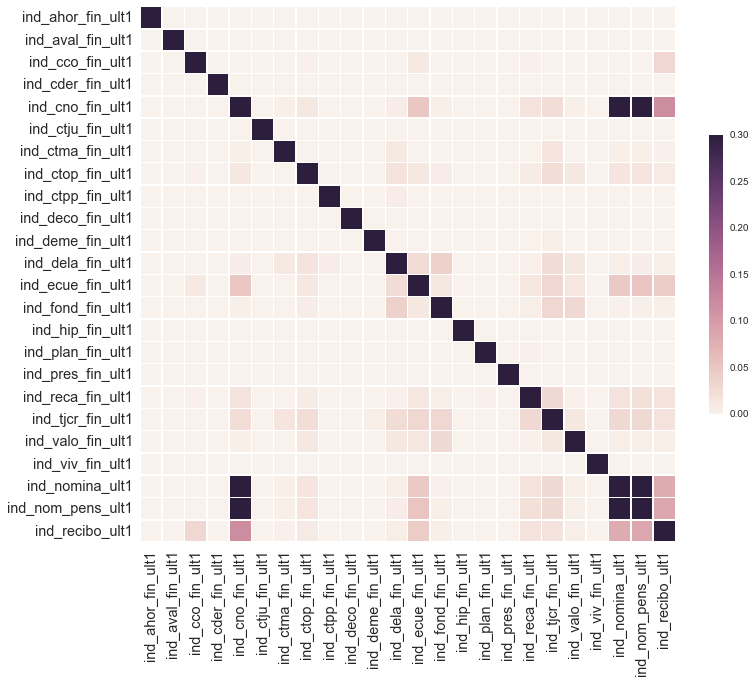

In [68]:
f, ax = plt.subplots(figsize=(12, 10))

jacob_matrix_list = map(lambda y: map(lambda z: y[z], header[2:]), map(lambda x: jacob_matrix[x], header[2:]))
j = seaborn.heatmap(jacob_matrix_list,xticklabels=header[2:], yticklabels=header[2:], vmax=.3,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
t = j.set_xticklabels(j.get_xticklabels(), size='x-large')
t = j.set_yticklabels(j.get_yticklabels(), size='x-large')

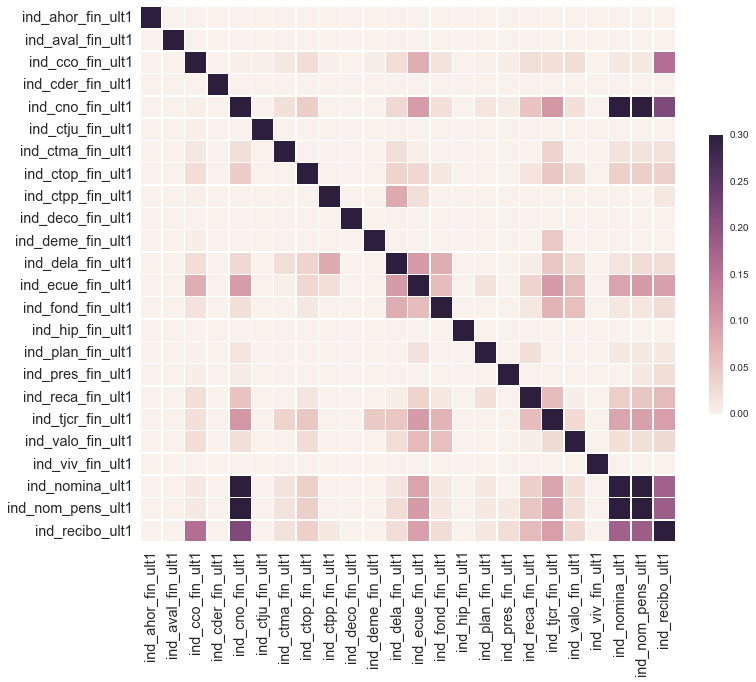

In [67]:
f, ax = plt.subplots(figsize=(12, 10))

cosine_matrix_list = map(lambda y: map(lambda z: y[z], header[2:]), map(lambda x: cosine_matrix[x], header[2:]))
c = seaborn.heatmap(cosine_matrix_list,xticklabels=header[2:], yticklabels=header[2:], vmax=.3,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
t = c.set_xticklabels(c.get_xticklabels(), size='x-large')
t = c.set_yticklabels(c.get_yticklabels(), size='x-large')